In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics, ensemble, decomposition
import random
from IPython.display import Image
%matplotlib inline
!pwd

/Users/mgalarny/Desktop/mgalarny/DSE200/day_3_models_and_learning


###Lecture3_Exercises

**Economics dataset analysis**

The folder economics (~/DSE200/DSE200/data/economics/) has a set of small datasets corresponding to different economics topics. We will use Pandas to incorporate these datasets into our workflow, merge them and analyze the economic trends as a function of time.

To achieve this, do the following

1. Read each of the csv files iteratively
2. Merge all of the data into a single dataframe by building a dictionary where the keys are the codes and the values are the Series from each downloaded file
3. Construct the Term and Default premia series using basic math on the series, and mmerge the resulting series using JOIN operation. HINT: term_premium = merged_data[’GS10’] - merged_data[’GS1’] and default_premium = merged_data[’BAA’] - merged_data[’AAA’]
4. Process the data
5. Plot ’GDP_growth’,’IP_growth’ and 'Unemp_rate' a a function of time and draw inferences
6. Use pandas function scatter_matrix to generate scatter plots of ’GDP_growth’,’IP_growth’ and 'Unemp_rate' in a mmatrix form with kernel density plots along the diagonals.

Note: Processing the data is of utmost importance for better readability and understanding of the data. Process the above data by ensuring the following

1. dropping the rows with null values
2. Output data regularly to see if they are following regular format. Use pandas.series.pct_change wherever necessary


In [2]:
# 1 & 2

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics, ensemble, decomposition
import random
%matplotlib inline
import pandas as pd


try:
    del merged_data
except:
    pass
individual_files = ['AAA','BAA','CPILFESL','GDPC1','GS1','GS10','INDPRO','UNRATE']
for ifile in individual_files:
    one_data_file = open(r'/Users/mgalarny/Desktop/mgalarny/DSE200/day_3_models_and_learning/data/economics/' + ifile +'.csv','r')
    df = pd.read_csv(one_data_file)
    df.rename(columns = {'VALUE':ifile}, inplace=True)
    try:
        merged_data = pd.merge(merged_data,df,how='outer', on="DATE")
    except:
        merged_data = df
    one_data_file.close()
merged_data.set_index('DATE', inplace=True)
merged_data.head()

,AAA,BAA,CPILFESL,GDPC1,GS1,GS10,INDPRO,UNRATE
DATE,,,,,,,,
1919-01-01,5.35,7.12,NaN,NaN,NaN,NaN,4.8582,NaN
1919-02-01,5.35,7.20,NaN,NaN,NaN,NaN,4.6435,NaN
1919-03-01,5.39,7.15,NaN,NaN,NaN,NaN,4.5092,NaN
1919-04-01,5.44,7.23,NaN,NaN,NaN,NaN,4.5898,NaN
1919-05-01,5.39,7.09,NaN,NaN,NaN,NaN,4.6166,NaN


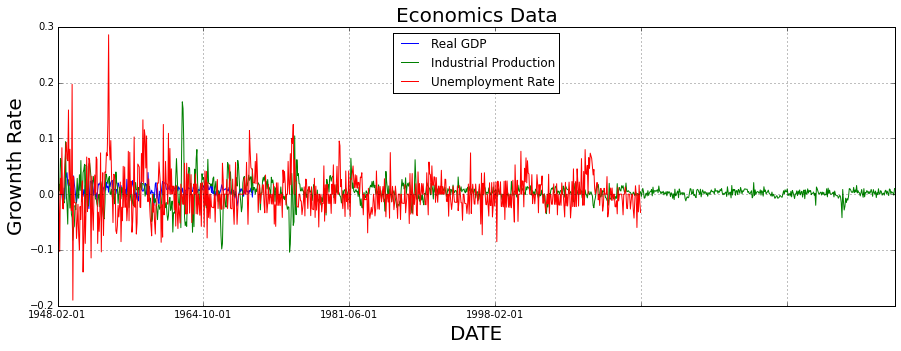

In [10]:
#result = left.join(right, how='outer')
term_premium = pd.Series(merged_data['GS10'] - merged_data['GS1'], name = 'termpremium')
default_premium = pd.Series(merged_data['BAA'] - merged_data['AAA'], name = 'defaultpremium')
#term_n_default = term_premium.join(default_premium, how='outer')
#term_n_default
premiumstuff = pd.concat([term_premium, default_premium], axis=1)
premiumstuff

GDPC1=merged_data['GDPC1'].dropna().pct_change().dropna() # pct_change introduces a nan so do dropna again to get better graph
INDPRO=merged_data['INDPRO'].dropna().pct_change().dropna() # pct_change introduces a nan so do dropna again to get better graph
UNRATE=merged_data['UNRATE'].dropna().pct_change().dropna() # pct_change introduces a nan so do dropna again to get better graph

#GDPC1[~GDPC1.isnull()]

#INDPRO[~INDPRO.isnull()]

#UNRATE[~UNRATE.isnull()]

f=plt.figure(figsize=(15,5))
GDPC1.plot()
INDPRO.plot()
UNRATE.plot()
plt.legend( ('Real GDP', 'Industrial Production', 'Unemployment Rate'), loc='upper center')
plt.title('Economics Data', fontsize = 20)
plt.xlabel('DATE', fontsize = 20)
plt.ylabel('Grownth Rate', fontsize = 20)
plt.grid()

**Drawn Inferences**
There seems to be a correlation between unemployment and industrial production as far as being volatile. It is unwise to spectulate without analyzing the data further. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f2afc90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10f99df90>]], dtype=object)

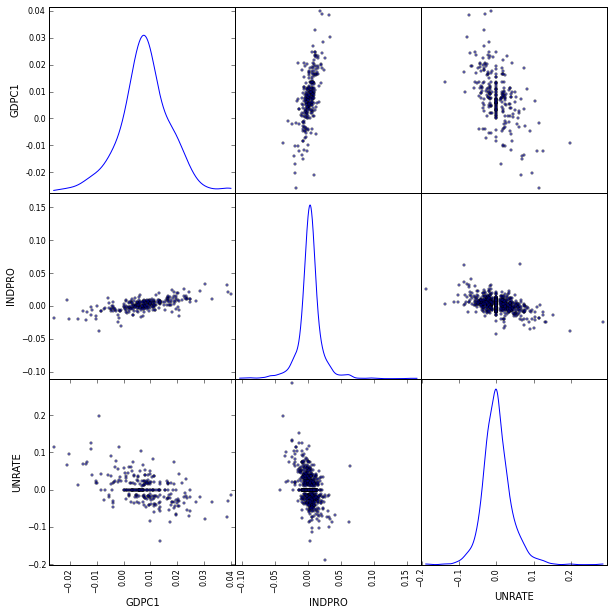

In [13]:
from pandas.tools.plotting import scatter_matrix

graphdata=pd.concat([GDPC1, INDPRO, UNRATE],axis=1).reset_index()
scatter_matrix(graphdata, figsize=(10,10), diagonal='kde')

In [14]:
!pwd

/Users/mgalarny/Desktop/mgalarny/DSE200/day_3_models_and_learning


**Nutrition dataset analysis**

Download the dataset from http://ashleyw.co.uk/files/foods-2011-10-03.json.zip
This data set is a compilation of data provided by the US department of Agriculture. The data set contains data for 6,636 unique foods and 94 unique nutrients (with an average of 56.5 nutrients per food)

Do the following

Use the built in python json module to load the food data into a python list

Your code should look like this

> import json
> db = json.load(open('foods-2011-10-03.json'))

db will be a list of 6636 python dictionaries, each containing nutritional information for a different food item. Each dictionary will have the following keys:

    1.portions
    2.description
    3.tags
    4.nutrients
    5.group
    6.id
    7.manufacture

Now, create a DataFrame of meta_data using the description, group, id, and manufacturer items in each dictionary.

Loop over db and construct a list of DataFrames containing the nutritional information for each record in db. Make sure to add a column to each of these DataFrames that contains the unique food id (id key in the dictionary)

Finally, use the pandas combining techniques to create a nutrients DataFrame. After you have done this drop duplicate entries in this DataFrame. For example, if you had named the objects nuts you would do

nuts = nuts.drop_duplicates()

Use the rename method to make sure that the description and group columns are un-ambiguous for both the meta_data DataFrame and the nutrients DataFrame (These column names are duplicated because every food has a description and group and each nutrient also has those identifiers). 

Finally, use the data combining routines to come up with a foods DataFrame containing all the meta_data and nutritional information. Make sure to do an outer style merge on the correct columns.

Using the foods DataFrame you have been building, compute the following things:

1. The food item with the highest content of each nutrient.
2. A function that accepts a nutrient name and a quantile value and generates a horizontal bar plot of the amount of that nutrient in each food group. Provide a plot title. HINT: You will need to use the quantile and sort (or order ) methods in order for this to work. 

####Creating Meta_Data

In [2]:
#!wget https://github.com/pydata/pydata-book/blob/master/ch07/foods-2011-10-03.json?raw=true

####Computing max nutrient contents

####Function for visualizing the quantile of each group for a given nutrient

**Classifying Digits**
SKLearn has many intereting datasets pre-loaded in it, one of which is load_digits (sklearn.datasets.load_digits - http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Load_digits is a dataset of digits, with each datapoint being a 8x8 image of a digit. 

You can load this dataset as follows

And the images can be visualized as follows

1. Visualize the first 15 digits to get a better understanding of the data
2. With x as data and y as target, classify the above datasets into individual targets using a decision tree
3. Perform this classification task with sklearn.svm.SVC. How does the choice of kernel affect the results?
4. Perform this classification task with sklearn.ensemble.RandomForestClassifier. Write in the markdown below the impact each of the parammeter had on the result



        1. max_depth: 
        2. max_features:
        3. n_estimators:



Try a few sets of parameters for each model and check the F1 score (sklearn.metrics.f1_score) on your results. Output the best F1 score that you achieve. 



We can see different images of the digits 0-9.

Linear, Polynomial and RBF kernels produce the best results. The difference between them is negligible as we are dealing with randomized datasets.

Sigmoid produces a significanly low score and hence is not appropriate for this model.

The scores are around 0.9 when all 3 parameters are equal to 10.

###Dimensionality Reduction - PCA

Principal Component Analysis is a very powerful unsupervised method for dimensionality reduction in data.
Apply dimensionality reduction technique PCA (Principle Component Analysis) on the prev dataset - load_digits(). Use the sklearn inbuilt tool sklearn.decomposition.PCA
Print the shape of the matrix before and after the application of PCA on the dataset. Using variance, analyze the ammount of information thrown away and plot the variance(cumulative) against the number of components
Try other dimensionality reduction techniques - sklearn.decomposition.RandomizedPCA, sklearn.decomposition.FastICA as well (this extended analysis need not be submitted as part of homework)

There is no apparent change in K value using Ramdomized PCA instead of PCA.

###Weather Analysis

<span style="color:red"> The correlations between different $V_i$ components should be zero, which it isn't.
Is this due to numerical roundoff errors? Are the correlations statistically significant for this sample size? </span>

For the sample size, the error value is high. This is because the values are greater than 0.05.

<span style="color:red">Waiting for somebody to write a script that will do that automatically from python i.e write a script in python return the google maps url when passed with the latitude and longitudinal values of the place</span>


In [2]:
# 1.
def Q1GoogleMapsUrl(lon, lat):
    maps='https://www.google.com/maps/@'
    url = maps + lat + ',' + lon + ',17z'
    return url

# lat -2.163106 Somewhere in the amazon (Brazil)
# lon -55.126648
lat='-2.163106'
lon='-55.126648'
Q1GoogleMapsUrl(lon,lat)

'https://www.google.com/maps/@-2.163106,-55.126648,17z'

#2.
<span style="color:red">Can you create a map where the denity of points is represented as a density map (topographical map)?</span>

See the Density map below and the ipython notebook 02_WeatherAnalysisTurnin.ipynb

<img src="Density Map.png">

#3. 
<span style="color:red">Can you create a map that would represent, using color, the values of a chosen column (Mean, Std, V0,V1 etc.)? What conclusions can you draw from this map?</span>

<img src="colder .png">
<img src="elevation.png">
From these images, it is clear that it is colder up north and in 
Colorado. The elevation chart is interesting in that it shows a correlation between the elevation in Colorado and the temperature. 
]

<span style="color:red"> Check how the approximations change/improve as you increase the number of coefficients</span>



<span style="color:red">Can you reduce the reconstruction error (using a fixed number of eigenvectors) by splitting the stations according to region (for example country, state, latitudal range). Note that having a regions with very few readings defeats the purpose.


